#CASE STUDY ON REGRESSION AND CORRELATION BASED ON SALES DATASET


In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
companydata='Add_sales_data_2018.csv'
df=pd.read_csv(companydata)
df

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...,...
200,2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
201,2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
202,2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
203,2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
df.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

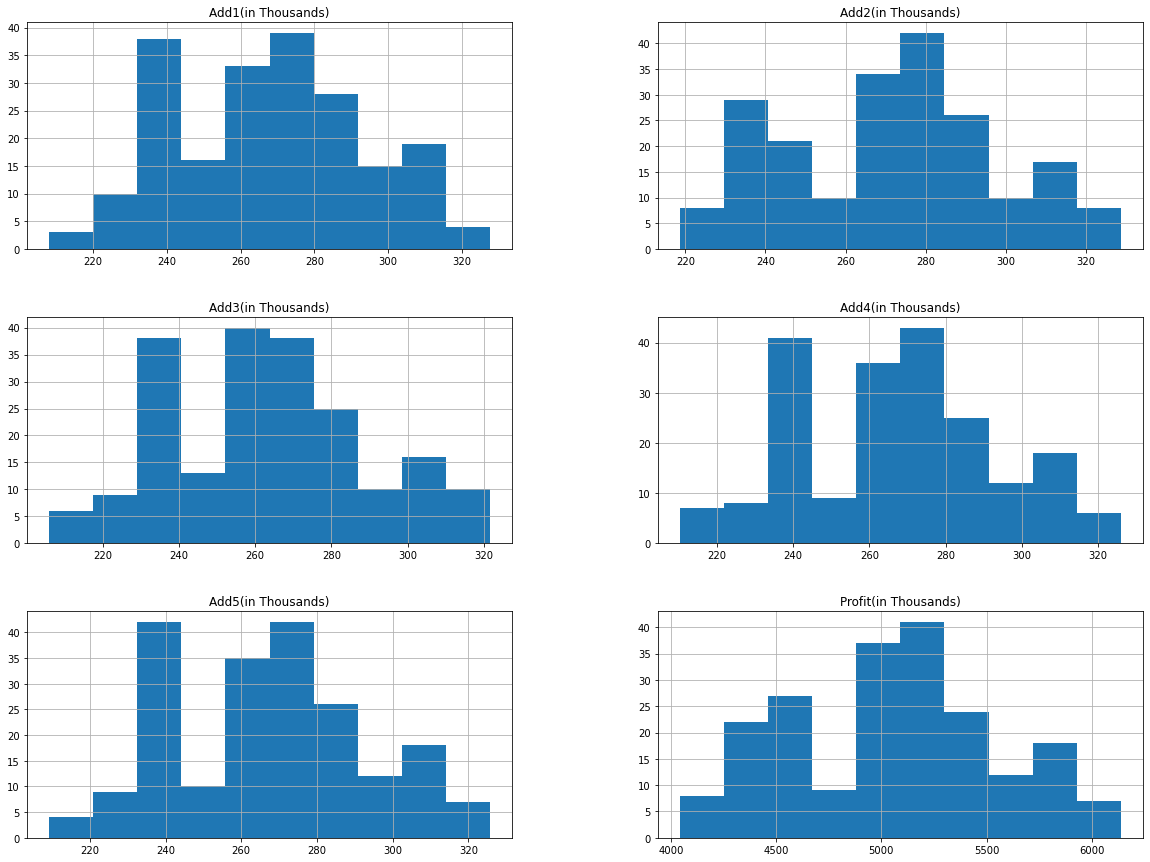

In [9]:
freqgraph=df.select_dtypes(include=['object','float64'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
#1 RELATION BETWEEN MONEY SPENT FOR ADVERTISING THROUGH FIVE DIFFERENT COMPANIES AND PROFIT GENERATED

<AxesSubplot:>

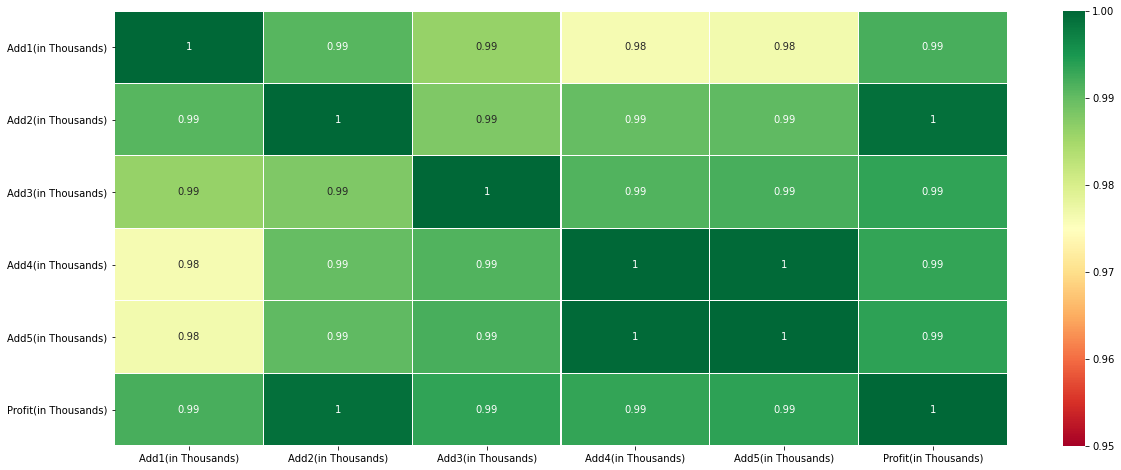

In [23]:
import seaborn as sns
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.95, vmax=1,annot=True,linewidths=0.2,cmap='RdYlGn')

In [26]:
corrmatrix['Profit(in Thousands)'].sort_values(ascending = False)

Profit(in Thousands)    1.000000
Add2(in Thousands)      0.999145
Add5(in Thousands)      0.993710
Add3(in Thousands)      0.993389
Add4(in Thousands)      0.993346
Add1(in Thousands)      0.991975
Name: Profit(in Thousands), dtype: float64

INSIGHTS:
    1)ALL VARIABLES ARE HIGHLY CORELATED TO EACH OTHER.
    2)VARIABLES ARE POSITIVELY CORRELATED VALUE RANGING FROM 0.98 TO 1.
    3)EVERY ADVERTISING COMPANY SHOWS HIGH POSITIVE CORELATION WITH PROFIT.
    4)AMONG THE COMPANIES SECOND ADVERTISING COMPANY SHOW HIGH CORELATION.
    5)INSHORT AS THE MONEY SPENT ON EACH COMPANIES INCREASE, THE PROFIT ALSO INCREASE.

#2 A REGRESSION MODEL TO PREDICT THE PROFIT FROM THE GIVEN DATA.

In [24]:
import pandas as pd
companydata='Add_sales_data_2018.csv'
df=pd.read_csv(companydata)


In [25]:
x = df[['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)']]
y = df['Profit(in Thousands)']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [26]:
from sklearn import linear_model 
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [27]:
print(y_test)
print(predictions)

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64
[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.5

In [29]:
from sklearn.metrics import mean_squared_error
print("MEAN SQUARED ERROR IS:",mean_squared_error(y_test,predictions))

MEAN SQUARED ERROR IS: 3.8177566733216664e-25


In [36]:
from sklearn.metrics import mean_absolute_error
print("MEAN ABSOLUTE ERROR IS:",mean_absolute_error(y_test,predictions))


MEAN ABSOLUTE ERROR IS: 4.197667854336592e-13


In [37]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,predictions)
print("r2=",r2)

r2= 1.0


INSIGHTS:
       1)MEAN SQUARE ERROR IS LOW,THE PREDICTION IS CLOSE TO THE ACTUAL MODEL.
       2)MEAN ABSOLUTE ERROR IS A LOW VALUE,SO LARGE ERROR IS NOT EXPECTED IN THE PREDICTION.
       3)R2 =1 INDICATES THAT THE REGRESSION PREDICTIONS PERFECTLY FIT THE DATA.

#3  THE PROFIT GENERATED BY THE COMPANY, IF THEY WISH TO SPEND FOLLOWING AMOUNT FOR ADVERTISEMENT.

    Add1(in Thousands)=290

    Add2(in Thousands)=312

    Add3(in Thousands)=309

    Add4(in Thousands)=298

    Add5(in Thousands)=320

In [33]:
new={ 'Add1(in Thousands)' :[290],'Add2(in Thousands)' :[312],'Add3(in Thousands)' :[309],'Add4(in Thousands)' :[298],'Add5(in Thousands)' :[320]}
df = pd.DataFrame.from_dict(new)

In [35]:
newpredictions= model.predict(df)
print(newpredictions)

[5820.06]
